In [1]:
import pandas as pd


In [8]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from math import sqrt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage
import numpy as np

In [ ]:
# Voy a probar el Metodo de cluster jerarquico

In [ ]:
# re datos

Hay que corregir al hacer la estandarizacion y escalado de los datos, agregar la columna de las ciudades. 

In [28]:
datos_std = pd.read_csv(r'C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\datos_completos\df_datos_std.csv', encoding = 'ISO-8859-1')
datos_originales = pd.read_csv(r'C:\Users\crist\Documents\GitHub\manifolds\ciudades\datos\datos_metricas_socioeconomicos_porcentajes.csv', encoding = "ISO-8859-1")

In [29]:
datos_originales

,Unnamed: 0,Ciudades,TA,LPI,AREA_MN,AREA_AM,AREA_MD,GYRATE_MN,GYRATE_AM,GYRATE_MD,...,Viviendas vacias,Total viviendas colectivas,COM,ED_SING,EQUIP,IND,OCIO,OFI,RES_PLU,RES_UNI
0,0,Albacete,1605.293355,2.929497,0.116461,2.976411,0.031520,8.380829,36.057566,5.710261,...,15081,22,0.445018,6.865100,12.018658,28.687649,0.698910,0.553468,16.789481,33.941716
1,1,Alcalá de Henares,1615.304126,2.451039,0.136451,4.559123,0.019854,7.591469,55.583827,4.874116,...,5798,30,1.557489,11.259171,19.280883,41.836920,0.823273,1.896484,13.994314,9.351466
2,2,Alcobendas,1386.626321,2.882984,0.289423,3.843857,0.069676,12.998986,45.886723,9.320043,...,1513,9,0.779649,10.608648,16.118619,12.718888,0.426558,4.777437,14.142538,40.427664
3,3,Alcorcón,787.044792,3.295528,0.161214,3.023467,0.028205,9.644223,43.879007,6.077800,...,3488,4,1.917222,6.864289,33.295606,25.021865,0.369681,0.344602,23.836880,8.349856
4,4,Algeciras,1063.319019,2.044908,0.063300,2.629819,0.013341,5.460983,38.065313,3.687046,...,6686,11,1.155169,2.049921,13.420545,14.524773,0.864348,0.355067,10.734807,56.895370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,Valencia,2164.215491,2.515410,0.065111,4.506163,0.024895,6.216411,38.408851,4.992987,...,57193,64,2.379026,4.969881,20.811788,15.182360,0.892344,0.835998,46.083622,8.844982
68,68,Valladolid,2764.692882,2.285334,0.170702,9.992102,0.028855,8.463257,74.230483,5.392190,...,18757,91,0.554566,6.484727,20.232697,35.579456,0.798932,0.459606,19.956694,15.933323
69,69,Vigo,2673.672921,4.253406,0.076896,7.653004,0.037150,7.448687,40.795189,6.359690,...,18588,58,0.428888,3.261984,15.139326,20.636726,0.557649,0.404116,11.824315,47.746995
70,70,Zamora,551.778808,9.977708,0.075195,6.638329,0.018018,6.080244,52.258509,4.223122,...,6673,17,1.117133,4.423836,24.288501,27.917586,0.424895,0.199479,21.520892,20.107680


In [14]:
# Parametros que se deben definir son
# n_clusters
# El metodo de distancia se define usando metric
# Puede ser euclidean, I1, I2, Manhattan, cosine, or precomputed.
# Linkage = {ward, complete, average, single}
Ag = AgglomerativeClustering(n_clusters = 4)

In [30]:
Ag.fit(datos_std.iloc[:,4:10])

AgglomerativeClustering(n_clusters=4)

In [31]:
Ag_labels = Ag.labels_

In [34]:
datos_std['Ciudades'] = datos_originales.Ciudades

In [35]:
datos_std["cluster"] = Ag_labels

In [36]:
datos_std

,Unnamed: 0,TA,LPI,AREA_MN,AREA_AM,AREA_MD,GYRATE_MN,GYRATE_AM,GYRATE_MD,PRD,...,COM,ED_SING,EQUIP,IND,OCIO,OFI,RES_PLU,RES_UNI,Ciudades,cluster
0,0,0.314551,-0.258187,0.327368,-0.138066,0.720840,0.870314,-0.206070,0.672197,-0.608088,...,-1.208120,-0.133722,-1.088896,0.473235,-0.297904,-0.223131,-0.676823,0.641814,Albacete,2
1,1,0.325526,-0.318266,0.705764,-0.122950,-0.387012,0.336316,0.005115,-0.129198,-0.613391,...,0.718016,0.347249,0.233995,1.775808,-0.154690,1.551582,-1.007277,-1.060270,Alcalá de Henares,2
2,2,0.074800,-0.264027,3.601412,-0.129781,4.344291,3.994473,-0.099764,4.131960,-0.613391,...,-0.628737,0.276043,-0.342045,-1.108639,-0.611539,5.358586,-0.989753,1.090757,Alcobendas,1
3,3,-0.582591,-0.212224,1.174510,-0.137616,0.406034,1.724994,-0.121478,1.024462,0.281662,...,1.340859,-0.133811,2.786925,0.110101,-0.677037,-0.499135,0.156343,-1.129599,Alcorcón,2
4,4,-0.279679,-0.369264,-0.678931,-0.141376,-1.005513,-1.104946,-0.184355,-1.266935,-0.171877,...,0.021438,-0.660786,-0.833528,-0.929747,-0.107389,-0.485306,-1.392626,2.230615,Algeciras,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,0.927362,-0.310183,-0.644650,-0.123456,0.091702,-0.593903,-0.180640,-0.015267,-0.829107,...,2.140427,-0.341170,0.512866,-0.864606,-0.075149,0.150214,2.786426,-1.095327,Valencia,2
68,68,1.585736,-0.339074,1.354110,-0.071062,0.467760,0.926076,0.206786,0.367345,-0.966982,...,-1.018448,-0.175357,0.407378,1.155941,-0.182721,-0.347164,-0.302385,-0.604688,Valladolid,2
69,69,1.485940,-0.091944,-0.421568,-0.093402,1.255488,0.239725,-0.154831,1.294637,-0.950065,...,-1.236047,-0.528115,-0.520433,-0.324294,-0.460576,-0.420490,-1.263821,1.597385,Vigo,2
70,70,-0.840540,0.626856,-0.453767,-0.103092,-0.561366,-0.686019,-0.030850,-0.753138,1.025930,...,-0.044418,-0.400940,1.146186,0.396952,-0.613454,-0.690906,-0.117460,-0.315748,Zamora,0


II. Ahora tenemos que hacer algo relacionado a la validación de los clusters usando el método del codo u otro método.

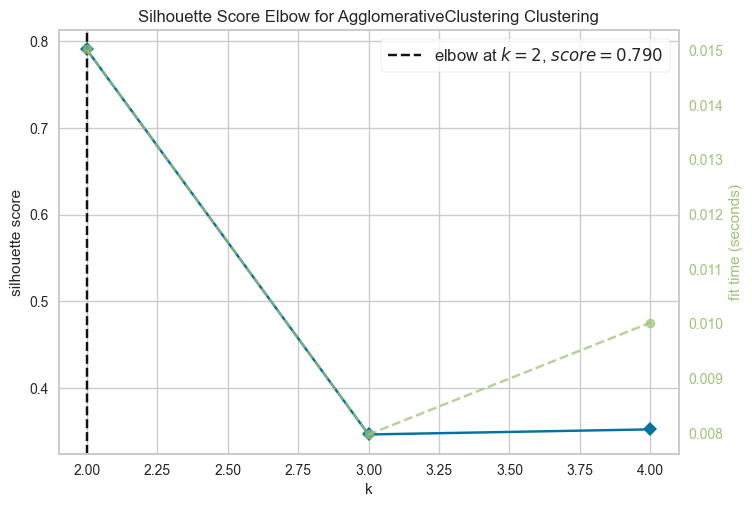

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [39]:
#Silhouette
aglomerativo = AgglomerativeClustering()
visualizer = KElbowVisualizer(aglomerativo, k=(2,5),metric = "silhouette")
visualizer.fit(datos_std.iloc[:,4:10])
visualizer.show()

In [43]:
#Davis Bouldin
dbindex = []

for k in range(2,10):
  agg = AgglomerativeClustering(n_clusters = k)
  agg.fit(datos_std.iloc[:,4:10])
  metrica_db = davies_bouldin_score(datos_std.iloc[:,4:10], agg.labels_)
  dbindex.append(metrica_db)

Text(0.5, 1.0, 'Índice Davies Bouldin')

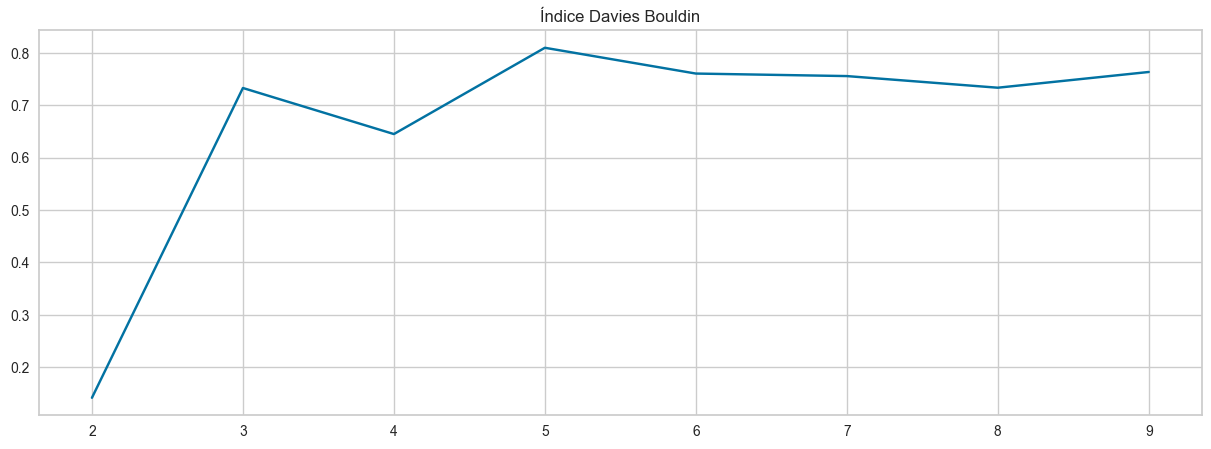

In [44]:
fig = plt.figure(figsize = (15,5))
plt.plot(range(2,10),dbindex)
plt.title("Índice Davies Bouldin")

### After choosing the best cluster we need to make the graph of contribution to each dimensions 

In [ ]:
## make a map